# Import Library numpy, pandas, matplotlib

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV menjadi dataframe dengan menggunakan pandas

In [36]:
df_londonCrime = pd.read_csv('D:/Kuliah/Kampus Merdeka Batch 5/sesi pembelajaran/dataset/london_crime_by_lsoa.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


info() adalah metode yang digunakan untuk mengakses informasi metadata tentang DataFrame. Metode ini memberikan ringkasan informasi penting tentang DataFrame, seperti jumlah baris dan kolom, tipe data setiap kolom, serta jumlah nilai yang tidak kosong (non-null) dalam setiap kolom.

In [37]:
df_londonCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


head() untuk menampilkan beberapa baris pertama dari DataFrame. Fungsi ini membantu Anda dengan cepat memeriksa data awal dalam DataFrame untuk memahami struktur data dan melihat contoh-contoh data di dalamnya. Secara khusus, fungsi ini biasanya digunakan untuk menampilkan lima baris pertama secara default, tetapi Anda juga dapat menentukan jumlah baris yang ingin ditampilkan dengan memberikan argumen ke dalamnya.

In [38]:
#melihat 5 baris pertama pada dataset
df_londonCrime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


tail() untuk menampilkan beberapa baris, tetapi kali ini, fungsi ini menampilkan beberapa baris terakhir dari DataFrame.

In [39]:
#melihat 5 baris terakhir pada dataset
df_londonCrime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


shape adalah atribut dalam pandas yang digunakan untuk mendapatkan dimensi (jumlah baris dan kolom) dari sebuah DataFrame atau array numpy.

In [40]:
df_londonCrime.shape

(13490604, 7)

# Area Plot

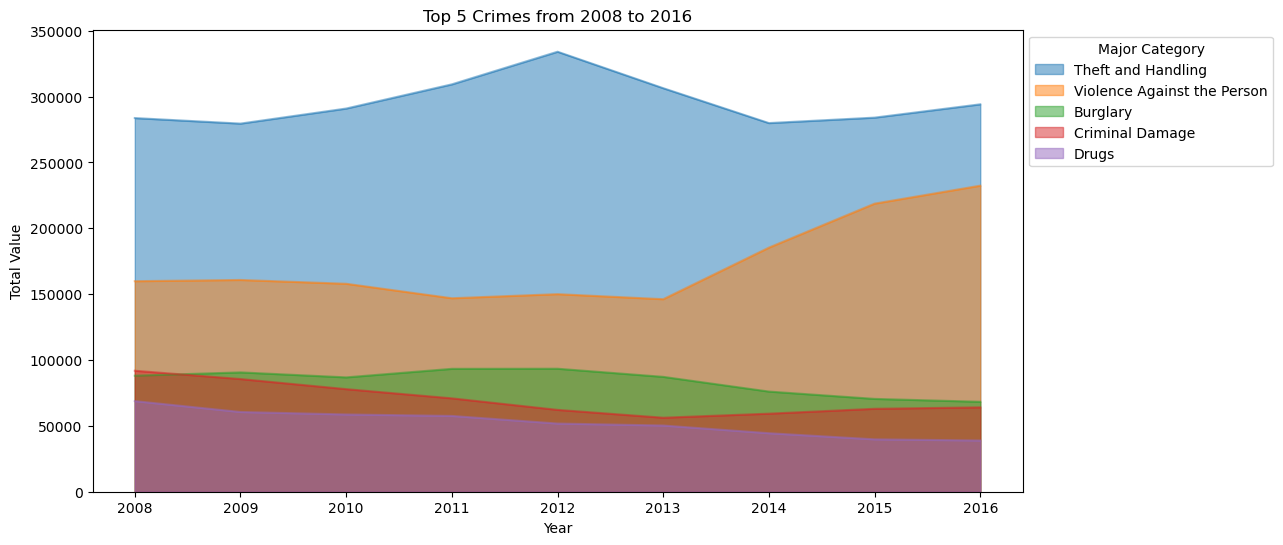

In [41]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']]

# Plot hasil top 5 jenis kejahatan dari tahun 2008 hingga 2016
top_5_pivot.plot(kind='area', stacked=False, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Top 5 Crimes from 2008 to 2016')
plt.legend(title='Major Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Dari Area Plot yang dibuat menggunakan dataset kita dapat mengetahui Major Category untuk Theft and Hadling mengalami kenaikan tingkat kejahatan pada tahun 2012 namun pada 2014 mengalami penurunan tingkat kejahatannya, Violence Against the Person mengalami penurunan tingkat kejahatan pada tahun 2011 namun pada 2016 mengalami kenaikan tingkat kejahatannya, Burglary mengalami kenaikan tingkat kejahatan pada tahun 2011 namun mengalami penurunan tingkat kejahatan pada tahun 2015, Criminal Damage mengalami penurunan tingkat kejahatan pada tahun 2009 namun pada 2014 mengalami kenaikan tingkat kejahatannya, Drugs mengalami penurunan tingkat kejahatan pada tahun 2015.

# Histogram

In [42]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(top_5_pivot)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins


[14 13  0  3  4  0  2  0  6  3]
[ 38914.  68428.  97942. 127456. 156970. 186484. 215998. 245512. 275026.
 304540. 334054.]


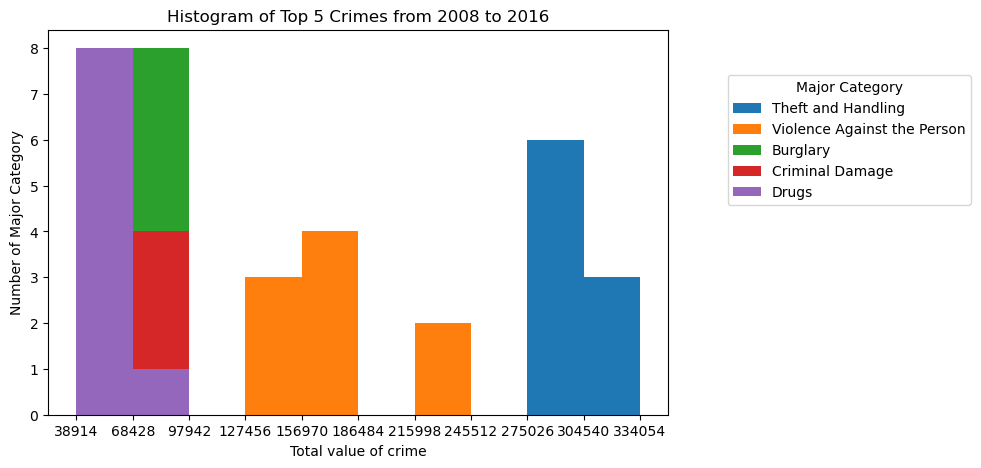

In [43]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']]

# Plot histogram untuk top 5 jenis kejahatan dari tahun 2008 hingga 2016
top_5_pivot.plot(kind='hist', figsize =(8, 5), xticks = bin_edges)
plt.xlabel('Total value of crime')
plt.ylabel('Number of Major Category')
plt.title('Histogram of Top 5 Crimes from 2008 to 2016')
plt.legend(title='Major Category', bbox_to_anchor=(1.5, 0.9), loc='upper right')
plt.show()

Dari Histogram diatas terdapat 14 jumlah major category untuk nilai crime 38914, 13 jumlah major category untuk nilai crime 68428, 0 jumlah major category untuk nilai crime 97942, 3 jumlah major category untuk nilai crime 127456, 4 jumlah major category untuk nilai crime 156970, 0 jumlah major category untuk nilai crime 186484, 2 jumlah major category untuk nilai crime 215998, 0 jumlah major category untuk nilai crime 245512, 6 jumlah major category untuk nilai crime 275026, 3 jumlah major category untuk nilai crime 304540.

# Bar Chart

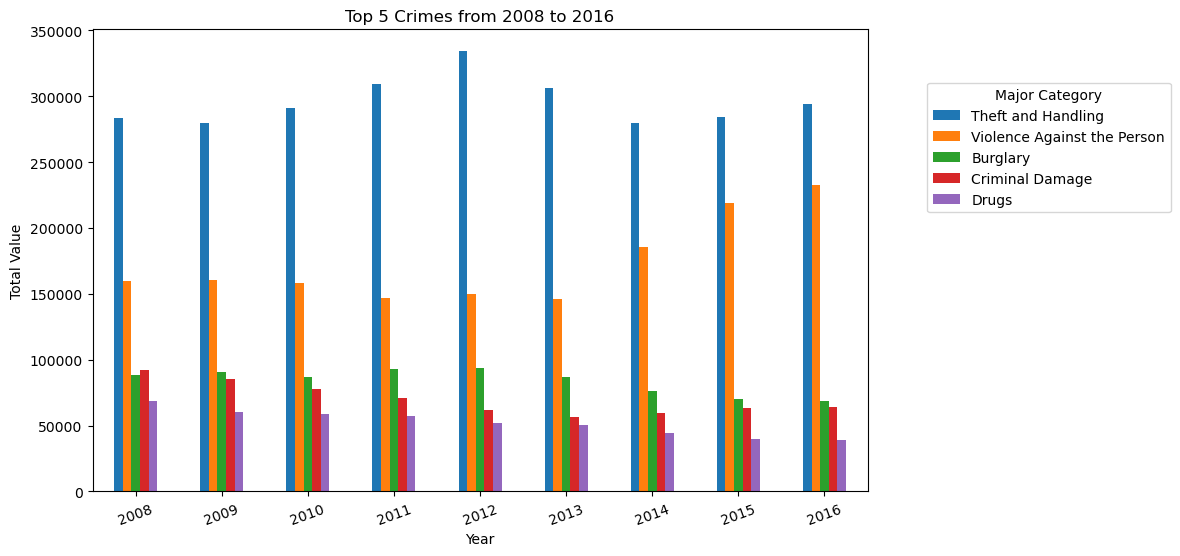

In [44]:

# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']]

# Buat plot bar chart
top_5_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Top 5 Crimes from 2008 to 2016')
plt.legend(title='Major Category', bbox_to_anchor=(1.4, 0.9), loc='upper right')
plt.xticks(rotation=20)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


Dari data hasil visualisasi diatas menggunakan bar charts pada tahun 2012 Major Category untuk Theft and Handling yang paling sering terjadi, pada tahun 2016 Major Category untuk Violence Against the Person yang paling sering terjadi, pada tahun 2012 Major Category untuk Burglary yang paling sering terjadi, pada tahun 2008 Major Category untuk Criminal Damage yang paling sering terjadi, pada tahun 2008 Major Category untuk Drugs yang paling sering terjadi.

# Pie Chart

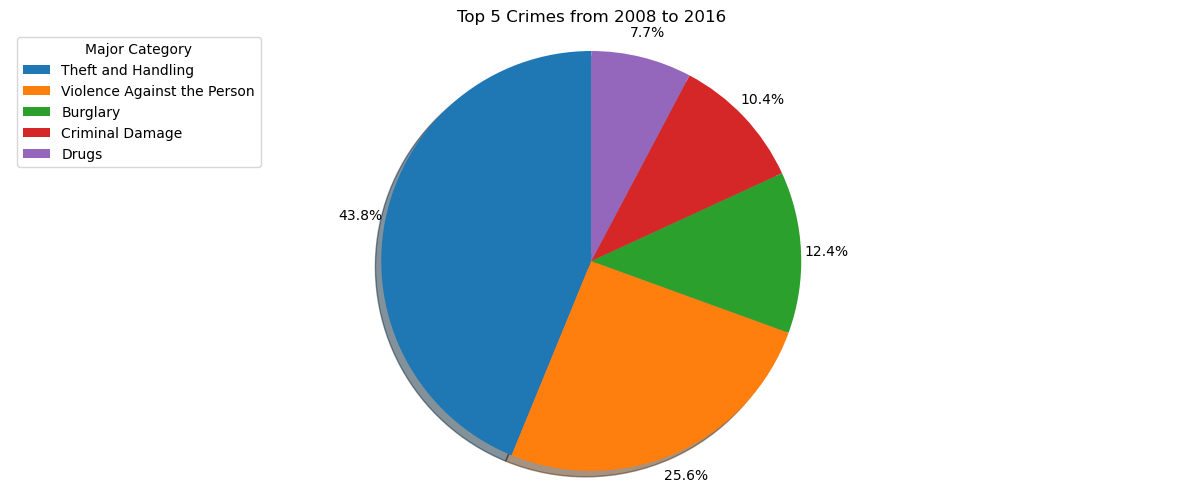

In [45]:


# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Buat pie chart
plt.figure(figsize=(15, 6))
plt.pie(top_5_crimes['value'], labels=None, autopct='%1.1f%%', startangle=90, shadow=True,       
                            pctdistance=1.12,    # the ratio between the center
       )
plt.title('Top 5 Crimes from 2008 to 2016')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(title='Major Category', labels=top_5_crimes['major_category'], loc='upper left')
plt.show()


Dari pie charts diatas Major Category tertinggi terdapat pada Theft and Handling dengan jumlah 43.8% dan yang terendah terdapat pada Drugs dengan jumlah 7.7% yang terjadi di kota london.

# Box Plot

major_category  Theft and Handling  Violence Against the Person      Burglary  \
count                     9.000000                     9.000000      9.000000   
mean                 295762.333333                173120.111111  83810.333333   
std                   17987.611959                 32113.207526   9658.166674   
min                  279492.000000                146181.000000  68285.000000   
25%                  283692.000000                150014.000000  76053.000000   
50%                  290924.000000                159844.000000  87222.000000   
75%                  306372.000000                185349.000000  90619.000000   
max                  334054.000000                232381.000000  93392.000000   

major_category  Criminal Damage         Drugs  
count                  9.000000      9.000000  
mean               70104.222222  52307.222222  
std                12424.545824  10066.338892  
min                56206.000000  38914.000000  
25%                62158.00000

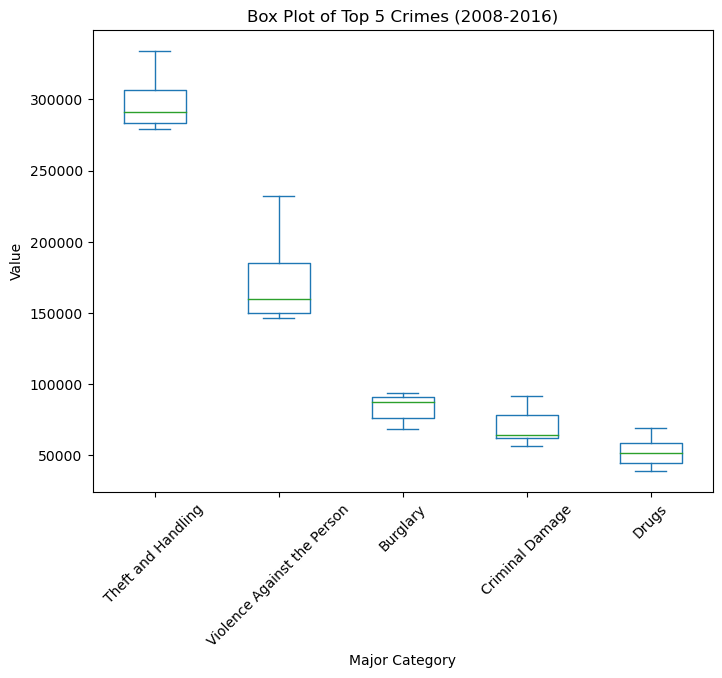

In [46]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']] 

# Let's view the percentages using the describe() method.
print(top_5_pivot.describe())

# Buat Box Plot
top_5_pivot.plot(kind='box', figsize=(8, 6))
plt.xlabel('Major Category')
plt.ylabel('Value')
plt.title('Box Plot of Top 5 Crimes (2008-2016)')
plt.xticks(rotation=45)
plt.show()

Dari Box plot data diatas untuk major_category Theft and Handling nilai Angka tertinggi berjumlah 334054, median berjumlah 295762 , Angka terkecil berjumlah 279492. Untuk major_category Violence Against the Person nilai Angka tertinggi berjumlah 232381, median berjumlah 173120, Angka terkecil berjumlah 146181. Untuk major_category Burglary nilai Angka tertinggi berjumlah 93392, median berjumlah 83810, Angka terkecil berjumlah 68285. Untuk major_category Criminal Damage nilai Angka tertinggi berjumlah 91872, median berjumlah 70104, Angka terkecil berjumlah 56206. Untuk major_category Drugs nilai Angka tertinggi berjumlah 68804, median berjumlah 52307, Angka terkecil berjumlah 38914.

# Scatter Plot

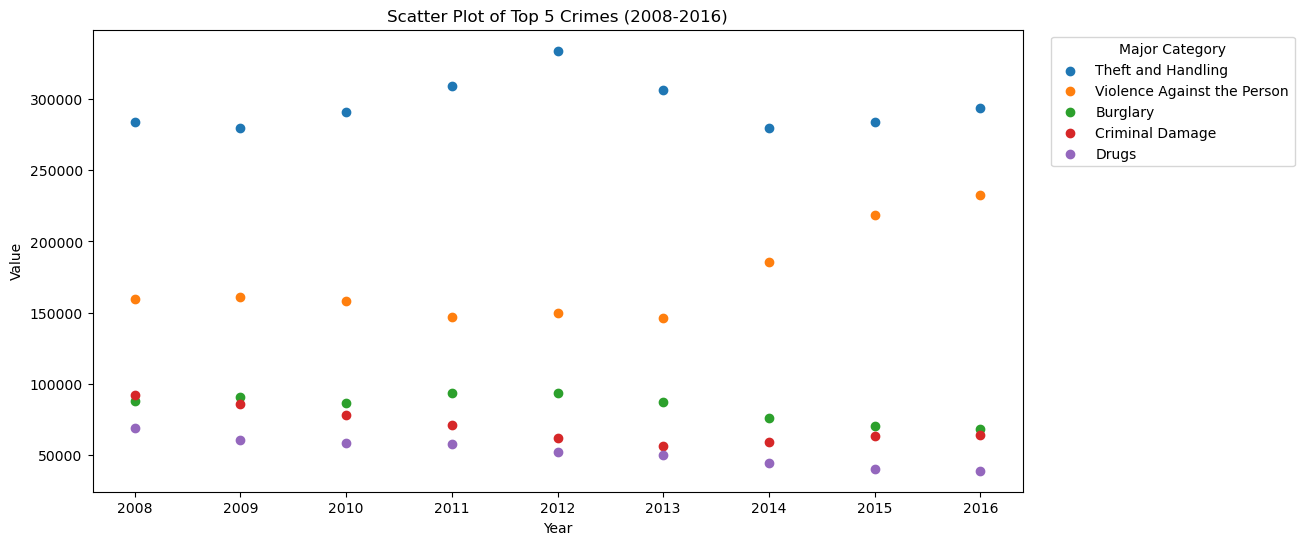

In [47]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan tahun, dan hitung total nilai (value)
total_per_crime_year = data_2008_to_2016.groupby(['major_category', 'year'])['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime_year.groupby('major_category')['value'].sum().nlargest(5).index

# Buat scatter plot untuk lima jenis kejahatan teratas
plt.figure(figsize=(12, 6))

for crime_type in top_5_crimes:
    crime_data = total_per_crime_year[total_per_crime_year['major_category'] == crime_type]
    plt.scatter(crime_data['year'], crime_data['value'], label=crime_type)

# Buat Scatter Plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot of Top 5 Crimes (2008-2016)')
plt.legend(title='Major Category', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

Berdasarkan Scatter plot diatas Major Category untuk Theft and Handling mengalami kenaikan pada tahun 2012 dan mengalami penurunan pada tahun 2013, Violence Against the Person mengalami kenaikan pada tahun 2014, Burglary mengalami kenaikan pada tahun 2011 dan mengalami penurunan pada tahun 2016, Criminal Damage mengalami penurunan pada tahun 2009 dan mengalami kenaikan pada tahun 2015, Drugs mengalami penurunan pada tahun 2014.

# Word Clouds

In [48]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


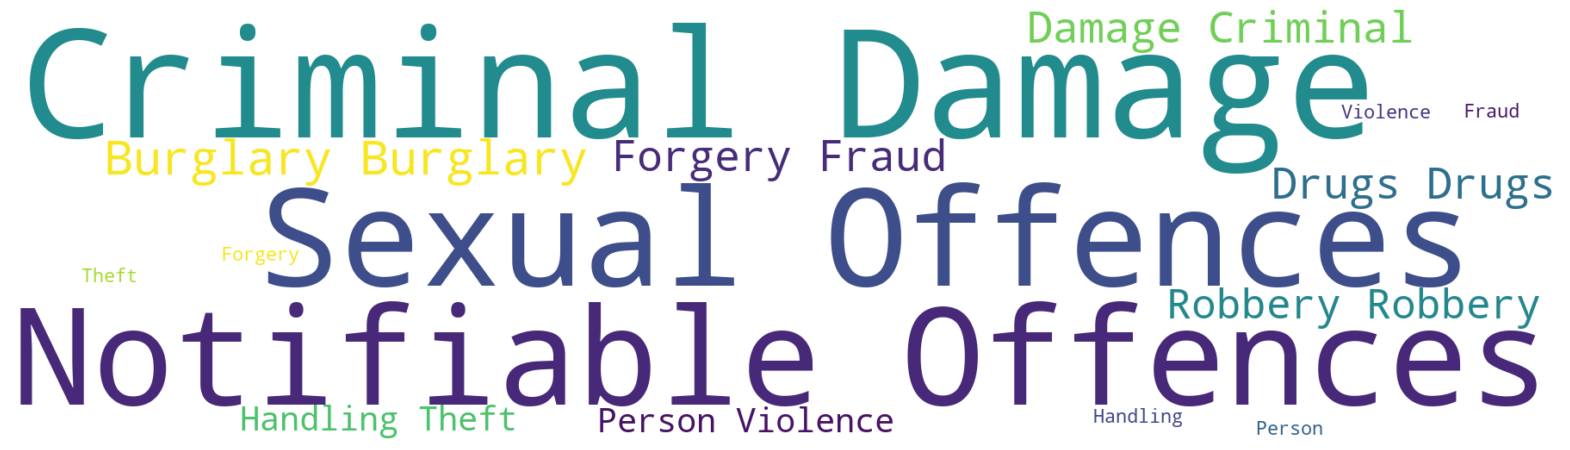

In [49]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df_londonCrime[(df_londonCrime["year"] >= 2008) & (df_londonCrime["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan tahun, dan hitung total nilai (value)
total_per_crime_year = data_2008_to_2016.groupby(['major_category', 'year'])['value'].sum().reset_index()

# Gabungkan deskripsi jenis kejahatan
crime_description = ' '.join(total_per_crime_year['major_category'])

# Membuat Word Cloud
wordcloud = WordCloud(width=1800, height = 500, background_color='white').generate(crime_description)

# Menampilkan Word Cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari hasil diatas menghasilkan Word Cloud yang memvisualisasikan jenis-jenis kejahatan yang terjadi di London antara tahun 2008 hingga 2016. Semakin besar kata-kata dalam Word Cloud, semakin sering jenis kejahatan tersebut terjadi selama periode tersebut. Data terbanyak terdiri dari Notifiable Offences, Criminal Damage, Sexual Offences.

# Folium Maps

In [50]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [51]:
# Membuat objek peta dengan koordinat pusat London
london_center = [51.5074, -0.1278]
london_map = folium.Map(location=london_center, zoom_start=12)

# Menambahkan marker sebagai contoh
folium.Marker(london_center, tooltip='London Center').add_to(london_map)

#Menampilkan Map
london_map


Pada kode diatas bertujuan untuk membuat peta interaktif dengan pusat di London dan menambahkan satu marker sebagai contoh.

# Overall Analysis

Apakah terjadi penurunan atau peningkatan jumlah kejahatan secara umum dari tahun 2008 hingga 2016? Pada tahun 2012 terjadi peningkatan kejahatan dengan kategori Theft and Handling. Pada tahun 2016 terjadi penurunan kejahatan dengan kategori Drugs.

Apa jenis kejahatan yang paling umum terjadi selama periode ini? Jenis kejahatan yang sering terjadi adalah kategori Theft and Handling.

Tahun mana yang memiliki tingkat kejahatan tertinggi? Pada tahun 2012 terjadi tingkatan kejahatan paling tinggi dengan kategori Theft and Handling. 